# Door Andeshi: Data Visualization Workshop

## Please run the cell below if you do not have the required libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

You should consider upgrading via the 'c:\users\m_waseem\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\m_waseem\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\m_waseem\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



     ------------------------------------ 292.8/292.8 KB 441.5 kB/s eta 0:00:00
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)

You should consider upgrading via the 'c:\users\m_waseem\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Logistics Dataset

In [4]:
# loading dataset
df_logistics=pd.read_csv('logistics_dataset.csv')

In [5]:
# groups the data and sums COD amount month wise
grouped_data=df_logistics.groupby('month').sum()['COD_Amount']

### Stem/Lollipop Plot

This block of code creates a lollipop plot showing the total COD amount in each month. You may play around with other parameters if you wish.

Text(0, 0.5, 'COD Amount')

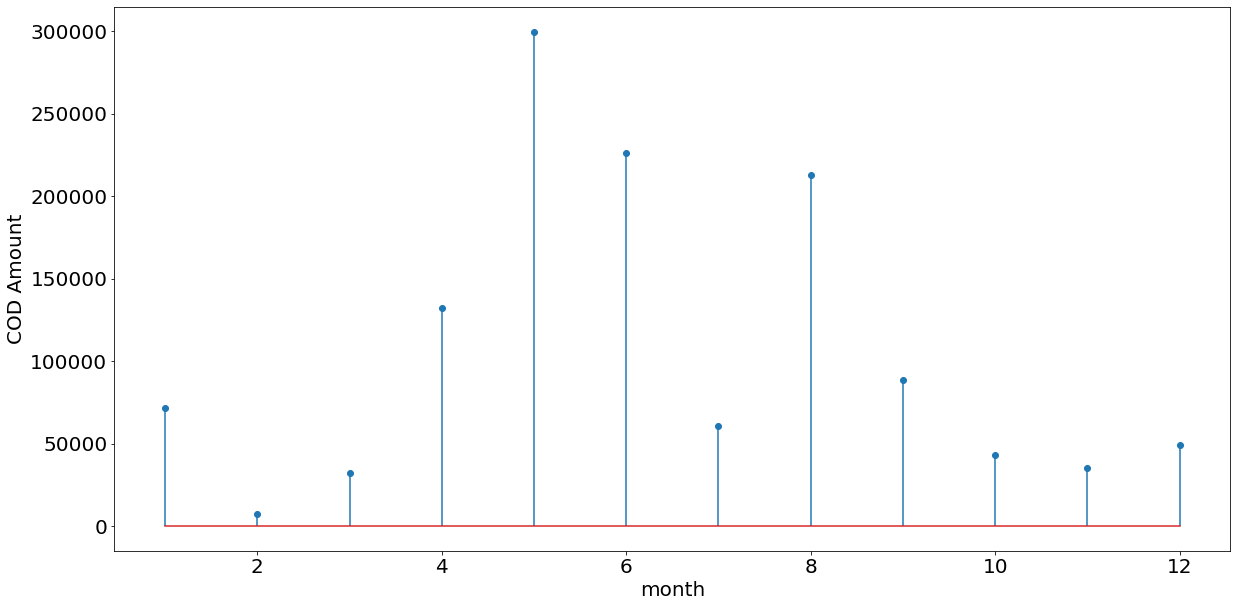

In [6]:
# controls the width and height of the plot
plt.figure(figsize=(20,10))

# controls the size of the x ticks/values
plt.xticks(size=20)

# controls the size of the y ticks/values
plt.yticks(size=20)

# y-axis values
y=grouped_data

# x-axis values
x=grouped_data.index

# creates the lollipop plot
plt.stem(x,y)

# creates and controls the size of the x label
plt.xlabel('month',size=20)

# creates and controls the size of the y label
plt.ylabel('COD Amount',size=20)

### Time-series Line Plot

In [12]:
# groups the data date wise and sums deliveries in each date,
# chosing those dates where the count was greater than or equal to 5
grouped_data=df_logistics.groupby('date').count().query('bookingDate>=5')['bookingDate']

This block of code creates a time series line plot showing the total amount of deliveries in each day.

Text(0, 0.5, 'Number of deliveries')

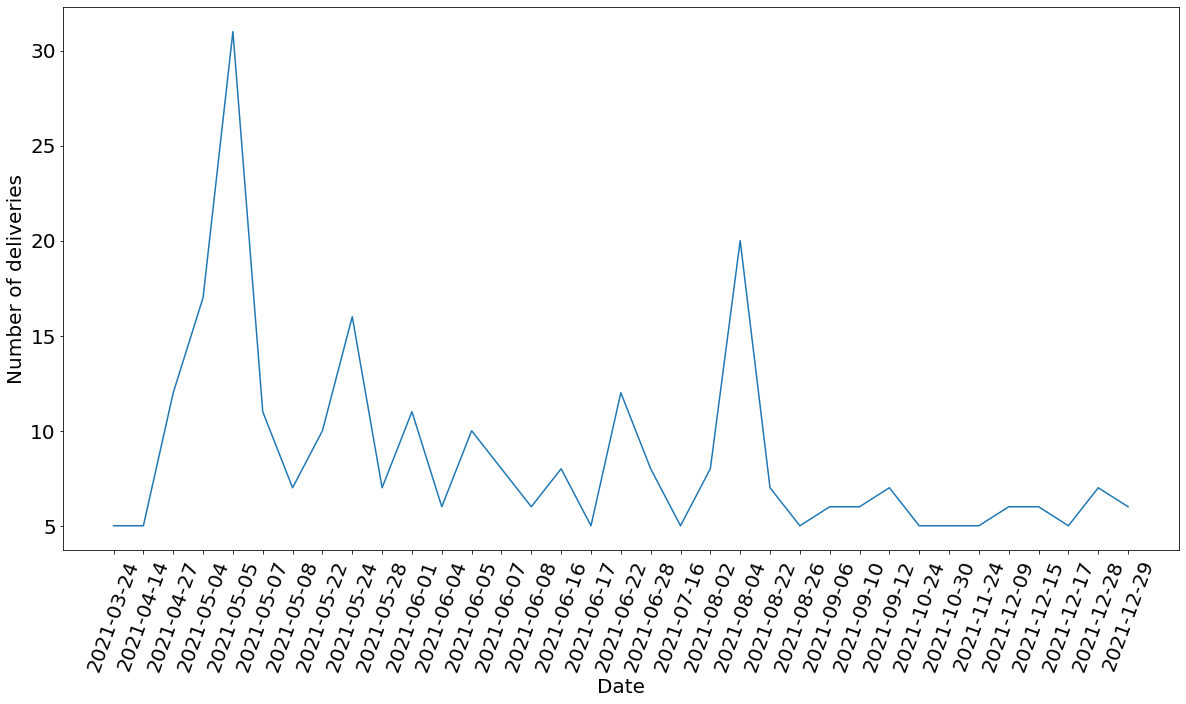

In [13]:
# controls the width and height of the plot
plt.figure(figsize=(20,10))

# controls the size and rotation/orientation of the x ticks/values
plt.xticks(size=20,rotation=70)

# controls the size of the y ticks/values
plt.yticks(size=20)

# creates the line plot
sns.lineplot(x=grouped_data.index.sort_values(),y=grouped_data)

# also try the follwing, it fills the area under the line plot.
# plt.fill_between(x=grouped_data.index.sort_values(),y1=grouped_data)

# creates and controls the size of the x label
plt.xlabel('Date',size=20)

# creates and controls the size of the x label
plt.ylabel('Number of deliveries',size=20)

# AQI Dataset

### Circular Bar Plot

In [14]:
# loading dataset
df_aqi=pd.read_csv('AQI_dataset.csv')

# groups the data sensor wise and counts the number of readings
grouped_data=df_aqi.groupby('location').count()['time']

Text(0.5, 0, 'Number of Readings')

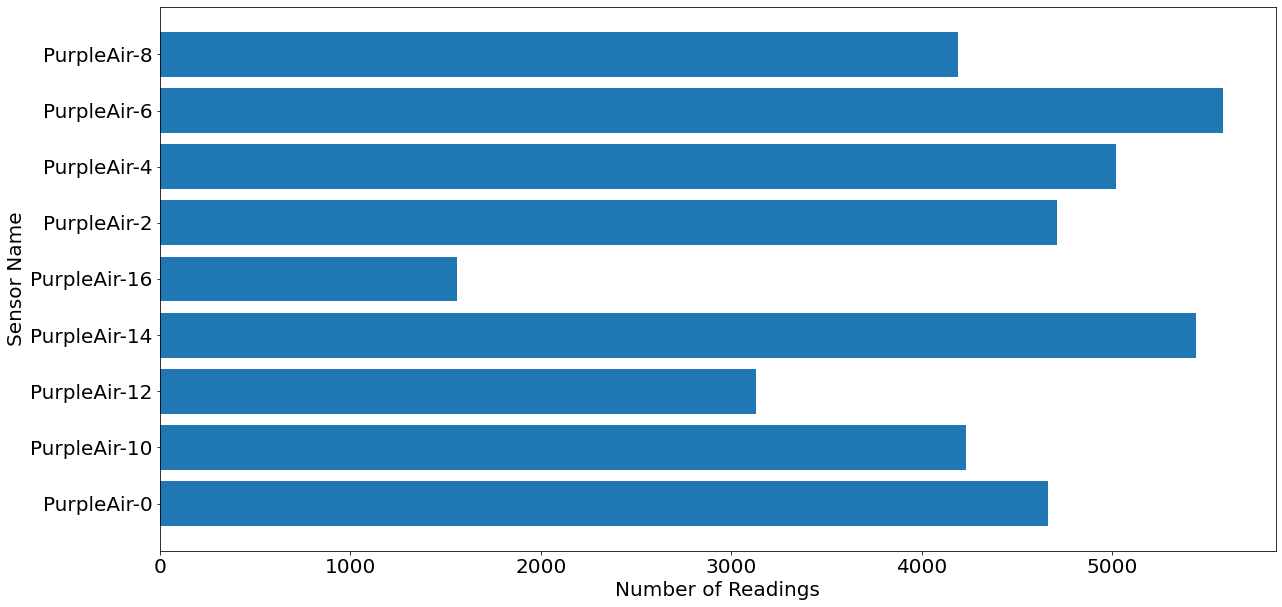

In [15]:
# In the follwing blocks, we create a circular bar plot 
# to show the same information as bar plot.

# creates a horizontal bar graph
plt.figure(figsize=(20,10))

plt.yticks(size=20)

plt.xticks(size=20)

plt.barh(y=grouped_data.index,width=grouped_data)

plt.ylabel('Sensor Name',size=20)

plt.xlabel('Number of Readings',size=20)

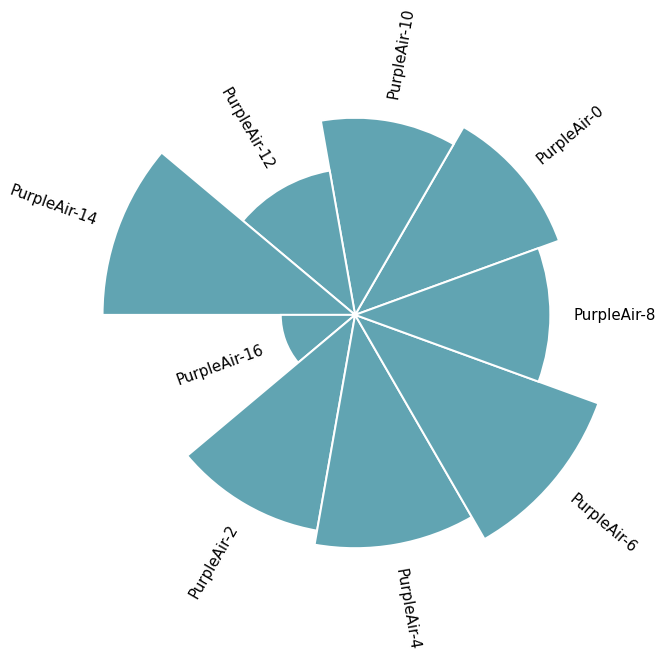

In [16]:
# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

max=grouped_data.max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
slope = (max - lowerLimit) / max
heights = slope * grouped_data + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(grouped_data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(grouped_data.index)+1))
angles = [element * width for element in indexes]
angles


# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 500

# Add labels
for bar, angle, height, label in zip(bars,angles, heights,grouped_data.index):

    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size=15) 